In [150]:
import numpy as np
import scipy as sp
import scipy.stats
import struct
import requests
import cPickle
import gzip
import random 
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from multiprocessing import Process, Queue
%matplotlib inline

In [133]:
# Load the dataset
# f: the pickled dataset
f = gzip.open('/Users/weiweili/Documents/UCSD-Stats/CSE 250B Fall16/HW1/mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()
# set[0] : image
# set[1] : label for each image
train_image = train_set[0]
train_label = train_set[1]
valid_image = valid_set[0]
valid_label = valid_set[1]
test_image = test_set[0]
test_label = test_set[1]
train_image = np.concatenate((train_image, valid_image))
train_label = np.concatenate((train_label, valid_label))
print "Data loaded"

Data loaded


4


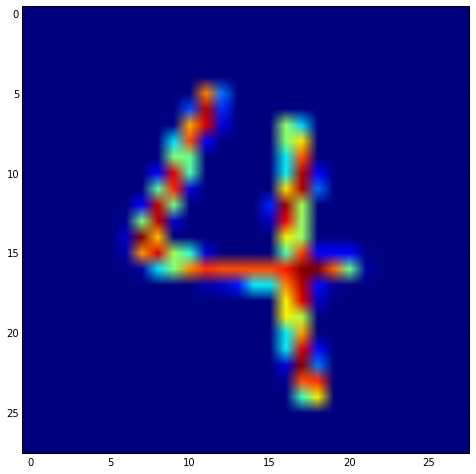

In [134]:
plt.figure(figsize=(8,8))
Index_im = 24
plt.imshow(np.reshape(test_set[0][Index_im],(28,28)))
print test_set[1][Index_im] #label value for this image

In [135]:
print len(test_set), len(test_set[0]), len(test_set[1])  #test_set[0]:the image of test set;
                                                         #test_set[1]:the label of test set
print len(train_set),len(train_image), len(train_label)


2 10000 10000
2 60000 60000


In [136]:
train_image_0 = []
train_image_1 = []
train_image_2 = []
train_image_3 = []
train_image_4 = []
train_image_5 = []
train_image_6 = []
train_image_7 = []
train_image_8 = []
train_image_9 = []
train_label_0 = []
train_label_1 = []
train_label_2 = []
train_label_3 = []
train_label_4 = []
train_label_5 = []
train_label_6 = []
train_label_7 = []
train_label_8 = []
train_label_9 = []

In [141]:
for i in range(len(train_label)):
    if i % 1000 == 0:
        print i
    if train_label[i] == 0:
        train_image_0.append(train_image[i])
        train_label_0.append(train_label[i])
        continue
    if train_label[i] == 1:
        train_image_1.append(train_image[i])
        train_label_1.append(train_label[i])
        continue
    if train_label[i] == 2:
        train_image_2.append(train_image[i])
        train_label_2.append(train_label[i])
        continue
    if train_label[i] == 3:
        train_image_3.append(train_image[i])
        train_label_3.append(train_label[i])
        continue
    if train_label[i] == 4:
        train_image_4.append(train_image[i])
        train_label_4.append(train_label[i])
        continue
    if train_label[i] == 5:
        train_image_5.append(train_image[i])
        train_label_5.append(train_label[i])
        continue
    if train_label[i] == 6:
        train_image_6.append(train_image[i])
        train_label_6.append(train_label[i])
        continue
    if train_label[i] == 7:
        train_image_7.append(train_image[i])
        train_label_7.append(train_label[i])
        continue
    if train_label[i] == 8:
        train_image_8.append(train_image[i])
        train_label_8.append(train_label[i])
        continue
    if train_label[i] == 9:
        train_image_9.append(train_image[i])
        train_label_9.append(train_label[i])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [142]:
print len(train_label_0)
print len(train_label_1)
print len(train_label_2)
print len(train_label_5)

11846
13484
11916
10842


In [143]:
# k-means prototype
M = 1000
model = KMeans(n_clusters=M/10)  #number of clusters=M/10
model.fit(train_image_0)
prototype_image = model.cluster_centers_  #cluster_centers_ : array, [n_clusters, n_features]
                                                        #Coordinates of objects in cluster 0
prototype_label = [0] * (M/10)          #a 0 vector, dimension is M/10.

 

In [144]:
print len(prototype_image) # the number of objects in the cluster for image_0
print len(prototype_label)

100
100


In [145]:
# k-means prototype
M = 10000
model = KMeans(n_clusters=M/10)
model.fit(train_image_0)
prototype_image = model.cluster_centers_
prototype_label = [0] * (M/10)
print 0
model.fit(train_image_1)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [1] * (M/10)))
print 1
model.fit(train_image_2)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [2] * (M/10)))
print 2
model.fit(train_image_3)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [3] * (M/10)))
print 3
model.fit(train_image_4)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [4] * (M/10)))
print 4
model.fit(train_image_5)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [5] * (M/10)))
print 5
model.fit(train_image_6)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [6] * (M/10)))
print 6
model.fit(train_image_7)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [7] * (M/10)))
print 7
model.fit(train_image_8)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [8] * (M/10)))
print 8
model.fit(train_image_9)
prototype_image = np.concatenate((prototype_image, model.cluster_centers_))
prototype_label = np.concatenate((prototype_label, [9] * (M/10)))
print 9

0
1
2
3
4
5
6
7
8
9


In [146]:
print np.array(prototype_image).shape
print np.array(prototype_label).shape

(10000, 784)
(10000,)


In [30]:
import warnings
warnings.filterwarnings("ignore")

In [147]:
# test
#k-means when k=M/10
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(prototype_image)
correct_classified = 0
for i in range(len(test_label)):
    if i % 500 == 0:
        print i
    neigh_index = neigh.kneighbors(test_image[i], return_distance=False) 
    #the position of the prototype_image which is the closest object to test_image[i]
    
    if test_label[i] == prototype_label[neigh_index]:
        correct_classified += 1
print "error rate = ", 1.0 - correct_classified * 1.0 / len(test_label)
print "Done"

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
error rate =  0.0298
Done


In [157]:
#calculate CI:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m,h

(0.15069399999999999,
 0.0019195509662456155,
 0.14877444903375439,
 0.1526135509662456)

In [152]:
#calculate CI (another way):
#scipy.stats.t.interval(0.95, len(rd_error)-1, loc=np.mean(rd_error), 
                       #scale=scipy.stats.sem(rd_error))

(0.14067674491409632, 0.15484325508590369)

In [179]:
# CI of random prototype
m=[1000,5000,10000]
CI=[]
for M in m:
    rd_error=[]
    for j in range(50):
        
        # random prototype:
        random_index = random.sample(range(len(train_label)),M)
        prototype_image = []
        prototype_label = []
        for i in range(len(random_index)):
            prototype_image.append(train_image[random_index[i]])
            prototype_label.append(train_label[random_index[i]])

        #test (uniform random):
        neigh = NearestNeighbors(n_neighbors=1)
        neigh.fit(prototype_image)
        correct_classified = 0
        for i in range(len(test_label)):
            neigh_index = neigh.kneighbors(test_image[i], return_distance=False)
            if test_label[i] == prototype_label[neigh_index]:
                correct_classified += 1
        error=1.0 - correct_classified * 1.0 / len(test_label)
        rd_error.append(error)
    print M

    m=mean_confidence_interval(rd_error, confidence=0.95 )[0]
    h=mean_confidence_interval(rd_error, confidence=0.95 )[1]
    CI.append([m,h])
print CI

10
20
[[0.69880000000000009, 0.043609901759434293], [0.56021999999999994, 0.042699108052922166]]


In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
#test
#uniform-random 

neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(prototype_image)
correct_classified = 0
for i in range(len(test_label)):
    if i % 1000 == 0:
        print i
    neigh_index = neigh.kneighbors(test_image[i], return_distance=False)
    if test_label[i] == prototype_label[neigh_index]:
        correct_classified += 1
print "error rate = ", 1.0 - correct_classified * 1.0 / len(test_label)
print "Done"

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
error rate =  0.1474
Done


In [110]:
#k-means method 
#k=5
M=10000
model = KMeans(n_clusters=5)
model.fit(train_image_0)
prototype_image0 = model.cluster_centers_
prototype_label02 = [0] * (M/10)
prototype_label0 = model.labels_
ind_im0=[]
for i in range(len(set(prototype_label0))):
    ind_im0 += random.sample(np.where(prototype_label0==i)[0], M/50)
image0 = []
for i in range(len(ind_im0)):
    image0.append(train_image_0[ind_im0[i]])
print 0


model = KMeans(n_clusters=5)
model.fit(train_image_1)
prototype_image1 = model.cluster_centers_
prototype_label12 = [1] * (M/10)
prototype_label1 = model.labels_

ind_im1=[]
for i in range(len(set(prototype_label1))):
    ind_im1 += random.sample(np.where(prototype_label1==i)[0], M/50)
image1 = []
for i in range(len(ind_im1)):
    image1.append(train_image_1[ind_im1[i]])
print 1


model = KMeans(n_clusters=5)
model.fit(train_image_2)
prototype_image2 = model.cluster_centers_
prototype_label22 = [2] * (M/10)
prototype_label2 = model.labels_

ind_im2=[]
for i in range(len(set(prototype_label2))):
    ind_im2 += random.sample(np.where(prototype_label2==i)[0], M/50)
image2 = []
for i in range(len(ind_im2)):
    image2.append(train_image_2[ind_im2[i]])
print 2


model = KMeans(n_clusters=5)
model.fit(train_image_3)
prototype_image3 = model.cluster_centers_
prototype_label32 = [3] * (M/10)
prototype_label3 = model.labels_

ind_im3=[]
for i in range(len(set(prototype_label3))):
    ind_im3 += random.sample(np.where(prototype_label3==i)[0], M/50)
image3 = []
for i in range(len(ind_im3)):
    image3.append(train_image_3[ind_im3[i]])
print 3


model = KMeans(n_clusters=5)
model.fit(train_image_4)
prototype_image4 = model.cluster_centers_
prototype_label42 = [4] * (M/10)
prototype_label4 = model.labels_

ind_im4=[]
for i in range(len(set(prototype_label4))):
    ind_im4 += random.sample(np.where(prototype_label4==i)[0], M/50)
image4 = []
for i in range(len(ind_im4)):
    image4.append(train_image_4[ind_im4[i]])
print 4


model = KMeans(n_clusters=5)
model.fit(train_image_5)
prototype_image5 = model.cluster_centers_
prototype_label52 = [5] * (M/10)
prototype_label5 = model.labels_

ind_im5=[]
for i in range(len(set(prototype_label5))):
    ind_im5 += random.sample(np.where(prototype_label5==i)[0], M/50)
image5 = []
for i in range(len(ind_im5)):
    image5.append(train_image_5[ind_im5[i]])
print 5


model = KMeans(n_clusters=5)
model.fit(train_image_6)
prototype_image6 = model.cluster_centers_
prototype_label62 = [6] * (M/10)
prototype_label6 = model.labels_

ind_im6=[]
for i in range(len(set(prototype_label6))):
    ind_im6 += random.sample(np.where(prototype_label6==i)[0], M/50)
image6 = []
for i in range(len(ind_im6)):
    image6.append(train_image_6[ind_im6[i]])
print 6


model = KMeans(n_clusters=5)
model.fit(train_image_7)
prototype_image7 = model.cluster_centers_
prototype_label72 = [7] * (M/10)
prototype_label7 = model.labels_

ind_im7=[]
for i in range(len(set(prototype_label7))):
    ind_im7 += random.sample(np.where(prototype_label7==i)[0], M/50)
image7 = []
for i in range(len(ind_im7)):
    image7.append(train_image_7[ind_im7[i]])
print 7


model = KMeans(n_clusters=5)
model.fit(train_image_8)
prototype_image8 = model.cluster_centers_
prototype_label82 = [8] * (M/10)
prototype_label8 = model.labels_

ind_im8=[]
for i in range(len(set(prototype_label8))):
    ind_im8 += random.sample(np.where(prototype_label8==i)[0], M/50)
image8 = []
for i in range(len(ind_im8)):
    image8.append(train_image_8[ind_im8[i]])
print 8


model = KMeans(n_clusters=5)
model.fit(train_image_9)
prototype_image9 = model.cluster_centers_
prototype_label92 = [9] * (M/10)
prototype_label9 = model.labels_

ind_im9=[]
for i in range(len(set(prototype_label9))):
    ind_im9 += random.sample(np.where(prototype_label9==i)[0], M/50)
image9 = []
for i in range(len(ind_im9)):
    image9.append(train_image_9[ind_im9[i]])
print 9





0
1
2
3
4
5
6
7
8
9


In [111]:

prototype_image = np.concatenate((image0,image1,image2,image3,image4,image5,image6,image7,image8,image9))
prototype_label = np.concatenate((prototype_label02,prototype_label12,prototype_label22,prototype_label32,
                                 prototype_label42,prototype_label52,prototype_label62,prototype_label72,
                                 prototype_label82,prototype_label92))
print np.array(prototype_image).shape
print np.array(prototype_label).shape

(10000, 784)
(10000,)


In [112]:
# test
#k-means, k=5
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(prototype_image)
correct_classified = 0
for i in range(len(test_label)):
    if i % 500 == 0:
        print i
    neigh_index = neigh.kneighbors(test_image[i], return_distance=False)
    if test_label[i] == prototype_label[neigh_index]:
        correct_classified += 1
print "error rate = ", 1.0 - correct_classified * 1.0 / len(test_label)
print "Done"
    
    
    


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
error rate =  0.0525
Done
